# Exploratory Data Analysis (EDA) on the Seoul Bike Sharing Dataset


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [6]:
df = pd.read_csv("SeoulBikeData (2).csv")
df.head()


,Date,Hour,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/01/2017,0,231,18.047171,35,1.924492,1836,14.516678,1.178176,0.396342,0.876657,Winter,Yes,Yes
1,01/01/2017,1,0,4.600159,71,3.128845,1254,1.511229,0.939976,1.791462,0.912338,Winter,Yes,Yes
2,01/01/2017,2,465,22.504512,52,2.991961,514,22.479587,2.540501,0.380192,0.284563,Winter,Yes,Yes
3,01/01/2017,3,430,24.405647,47,3.260292,1606,23.484097,1.136528,1.769030,0.220102,Winter,Yes,Yes
4,01/01/2017,4,0,-4.510352,75,1.792963,457,-7.688058,2.464666,1.525981,0.425867,Winter,Yes,Yes


df.describe()


df.info()


In [ ]:
### Dataset Information
The `.info()` function gives us a summary of the dataset, including:
- Column names  
- Total rows  
- Data types of each column  
- Count of non-null values  

This helps us understand the structure of the dataset and check if any missing values exist.


### Summary Statistics

The `.describe()` function shows basic statistics (count, mean, min, max, quartiles) for all numerical columns like:
- `Rented Bike Count`
- `Temperature(C)`
- `Humidity(%)`
- `Wind speed (m/s)` etc.

This helps us understand:
- Typical values (mean, median area)
- Range of data (min and max)
- Whether there are very large or very small values.


In [9]:
# Convert Date to datetime type
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# Create Month and DayOfWeek
df["Month"] = df["Date"].dt.month_name()
df["DayOfWeek"] = df["Date"].dt.day_name()

df[["Date", "Month", "DayOfWeek"]].head()


,Date,Month,DayOfWeek
0,2017-01-01,January,Sunday
1,2017-01-01,January,Sunday
2,2017-01-01,January,Sunday
3,2017-01-01,January,Sunday
4,2017-01-01,January,Sunday


### Creating Month and DayOfWeek Columns

- Converted the `Date` column into proper datetime format.
- Created two new columns:
  - `Month` – full month name (January, February, etc.)
  - `DayOfWeek` – day name (Monday, Tuesday, etc.)

These will be used to study how rentals change by month and by day of the week.


In [10]:
plt.style.use("seaborn-v0_8")
sns.set(style="whitegrid")


### Plot Style

Applied a clean Seaborn style to make all graphs easier to read and visually consistent.



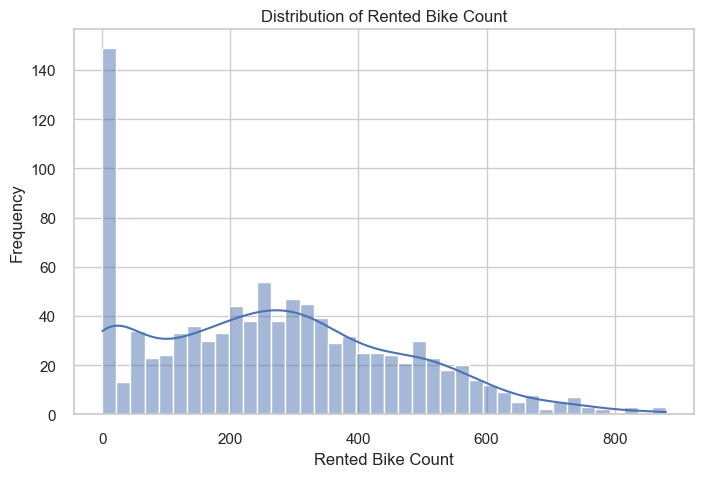

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Rented Bike Count"], bins=40, kde=True)
plt.title("Distribution of Rented Bike Count")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()


### Graph 1: Distribution of Rented Bike Count

This histogram shows how the values of `Rented Bike Count` are spread.
- We can see which rental ranges are most common.
- It also tells us whether the distribution is skewed (more low values or more high values).


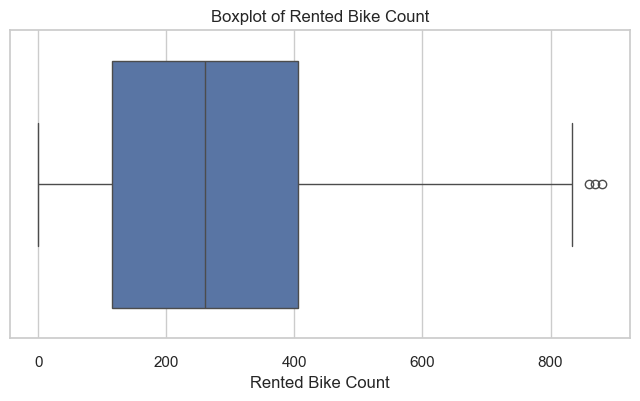

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Rented Bike Count"])
plt.title("Boxplot of Rented Bike Count")
plt.xlabel("Rented Bike Count")
plt.show()


### Graph 2: Boxplot of Rented Bike Count

The boxplot shows:
- Median rentals (middle line)
- Spread of the data (box and whiskers)
- Any outliers (points far away from the box).

This helps us see variability and presence of extreme values.


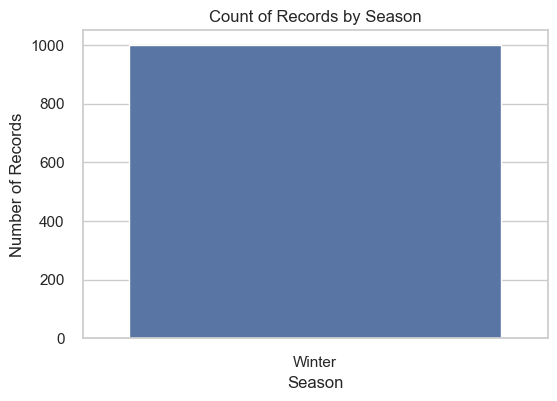

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Seasons")
plt.title("Count of Records by Season")
plt.xlabel("Season")
plt.ylabel("Number of Records")
plt.show()


### Graph 3: Count of Records by Season

This countplot shows how many hourly records belong to each `Seasons` category.
It helps us check if the dataset is balanced across winter, spring, summer, and autumn.


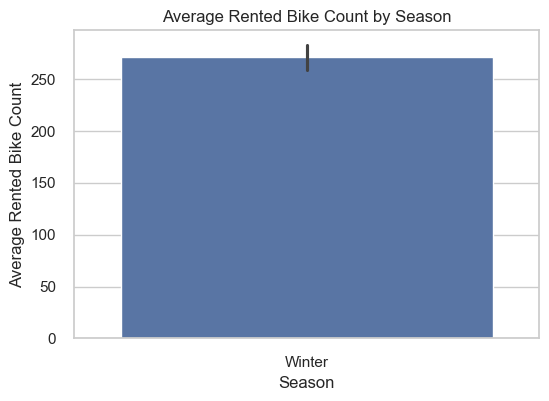

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Seasons", y="Rented Bike Count", estimator=np.mean)
plt.title("Average Rented Bike Count by Season")
plt.xlabel("Season")
plt.ylabel("Average Rented Bike Count")
plt.show()


### Graph 4: Average Rented Bike Count by Season

This barplot shows the **mean** rentals in each season.
We can see in which season people rent more bikes and in which season the demand is lower.


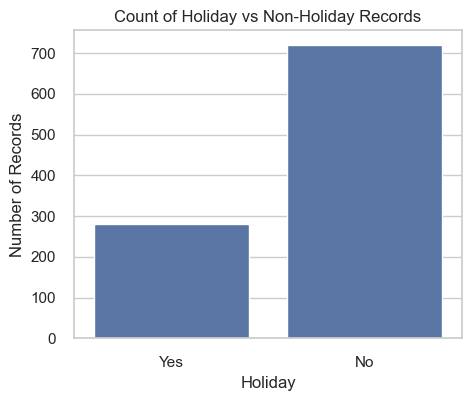

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Holiday")
plt.title("Count of Holiday vs Non-Holiday Records")
plt.xlabel("Holiday")
plt.ylabel("Number of Records")
plt.show()


### Graph 5: Holiday vs Non-Holiday Records

This plot shows how many rows are holidays and how many are non-holidays.
It tells us whether most of the data comes from regular working days or from holidays.


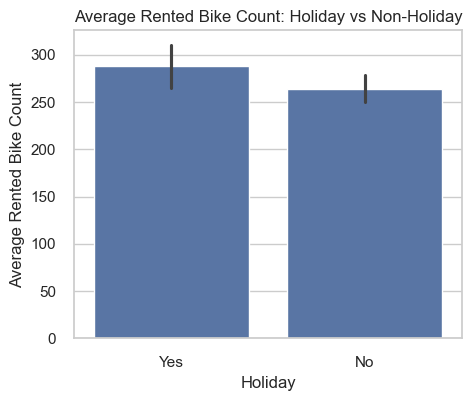

In [16]:
plt.figure(figsize=(5,4))
sns.barplot(data=df, x="Holiday", y="Rented Bike Count", estimator=np.mean)
plt.title("Average Rented Bike Count: Holiday vs Non-Holiday")
plt.xlabel("Holiday")
plt.ylabel("Average Rented Bike Count")
plt.show()


### Graph 6: Average Rentals on Holidays vs Non-Holidays

This barplot compares the average number of rentals on holidays and non-holidays.
We can see whether people tend to rent more bikes on normal days (commuting) or on holidays (leisure).


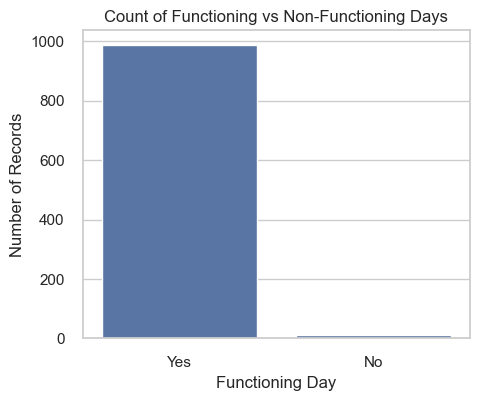

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Functioning Day")
plt.title("Count of Functioning vs Non-Functioning Days")
plt.xlabel("Functioning Day")
plt.ylabel("Number of Records")
plt.show()


### Graph 7: Functioning vs Non-Functioning Days

This shows how many records come from days when the bike system was working (`Yes`) and not working.
Usually, we expect almost all data from functioning days.


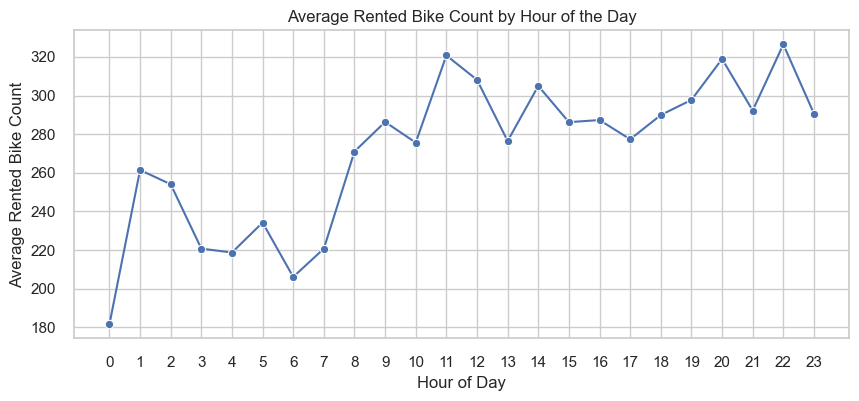

In [18]:
hourly_avg = df.groupby("Hour")["Rented Bike Count"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=hourly_avg, x="Hour", y="Rented Bike Count", marker="o")
plt.title("Average Rented Bike Count by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rented Bike Count")
plt.xticks(range(0,24))
plt.show()


hourly_avg = df.groupby("Hour")["Rented Bike Count"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=hourly_avg, x="Hour", y="Rented Bike Count", marker="o")
plt.title("Average Rented Bike Count by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rented Bike Count")
plt.xticks(range(0,24))
plt.show()


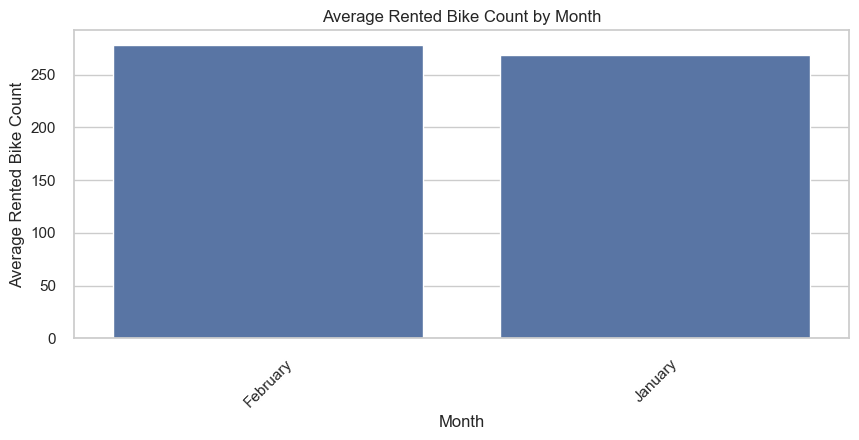

In [19]:
monthly_avg = df.groupby("Month")["Rented Bike Count"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(data=monthly_avg, x="Month", y="Rented Bike Count")
plt.title("Average Rented Bike Count by Month")
plt.xlabel("Month")
plt.ylabel("Average Rented Bike Count")
plt.xticks(rotation=45)
plt.show()


### Graph 9: Average Rented Bike Count by Month

This barplot shows how demand changes across months.
It highlights which months have higher or lower usage, reflecting seasonal trends.


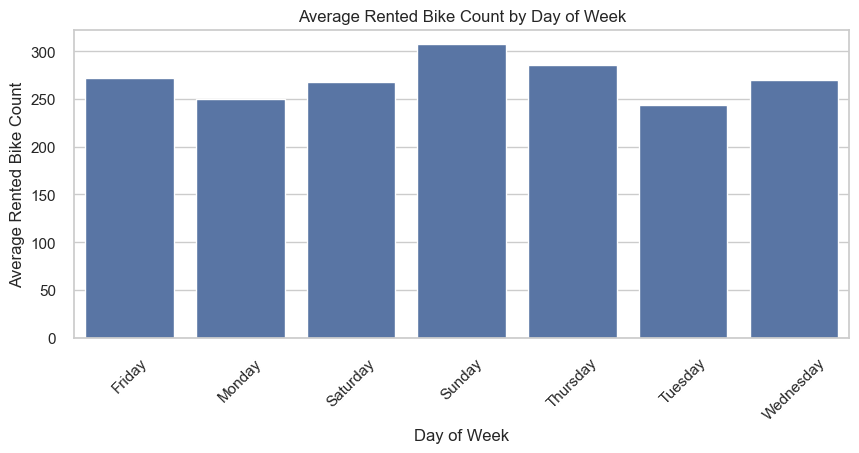

In [23]:
day_avg = df.groupby("DayOfWeek")["Rented Bike Count"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(data=day_avg, x="DayOfWeek", y="Rented Bike Count")
plt.title("Average Rented Bike Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Rented Bike Count")
plt.xticks(rotation=45)
plt.show()


### Graph 10: Average Rented Bike Count by Day of Week

This graph compares average rentals on each day from Monday to Sunday.
It helps us see if weekdays (office days) or weekends have higher bike usage.


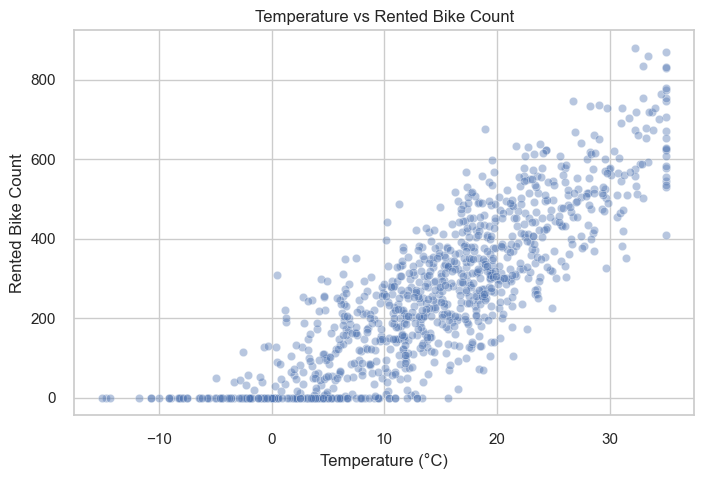

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Temperature(C)", y="Rented Bike Count", alpha=0.4)
plt.title("Temperature vs Rented Bike Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rented Bike Count")
plt.show()


### Graph 11: Temperature vs Rented Bike Count

This scatter plot shows how rentals change with temperature.
We can observe whether:
- Very cold or very hot temperatures reduce rentals.
- Moderate temperatures are associated with higher demand.


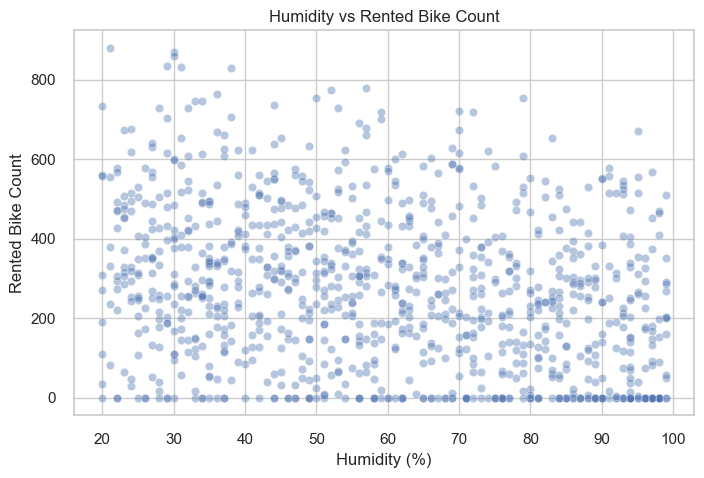

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Humidity(%)", y="Rented Bike Count", alpha=0.4)
plt.title("Humidity vs Rented Bike Count")
plt.xlabel("Humidity (%)")
plt.ylabel("Rented Bike Count")
plt.show()


### Graph 12: Humidity vs Rented Bike Count

This scatter plot checks the relationship between humidity and bike rentals.
It shows whether very high humidity (uncomfortable weather) is linked with fewer rentals.


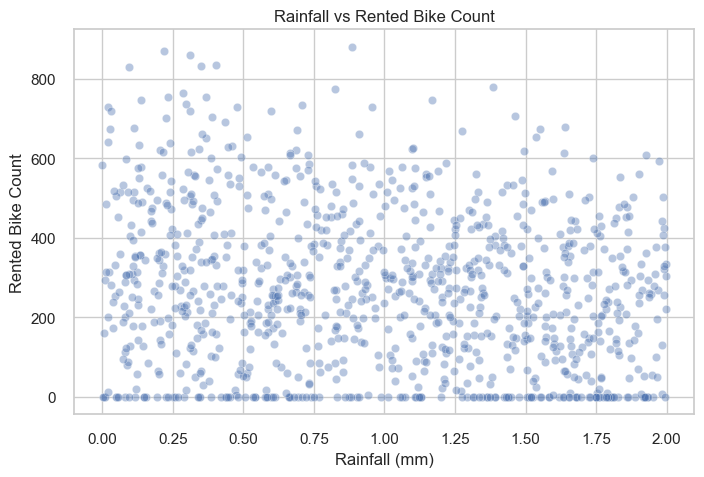

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Rainfall(mm)", y="Rented Bike Count", alpha=0.4)
plt.title("Rainfall vs Rented Bike Count")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Rented Bike Count")
plt.show()


### Graph 13: Rainfall vs Rented Bike Count

This plot shows how rainfall affects bike usage.
Usually, higher rainfall leads to fewer bike rentals because people avoid riding in the rain.


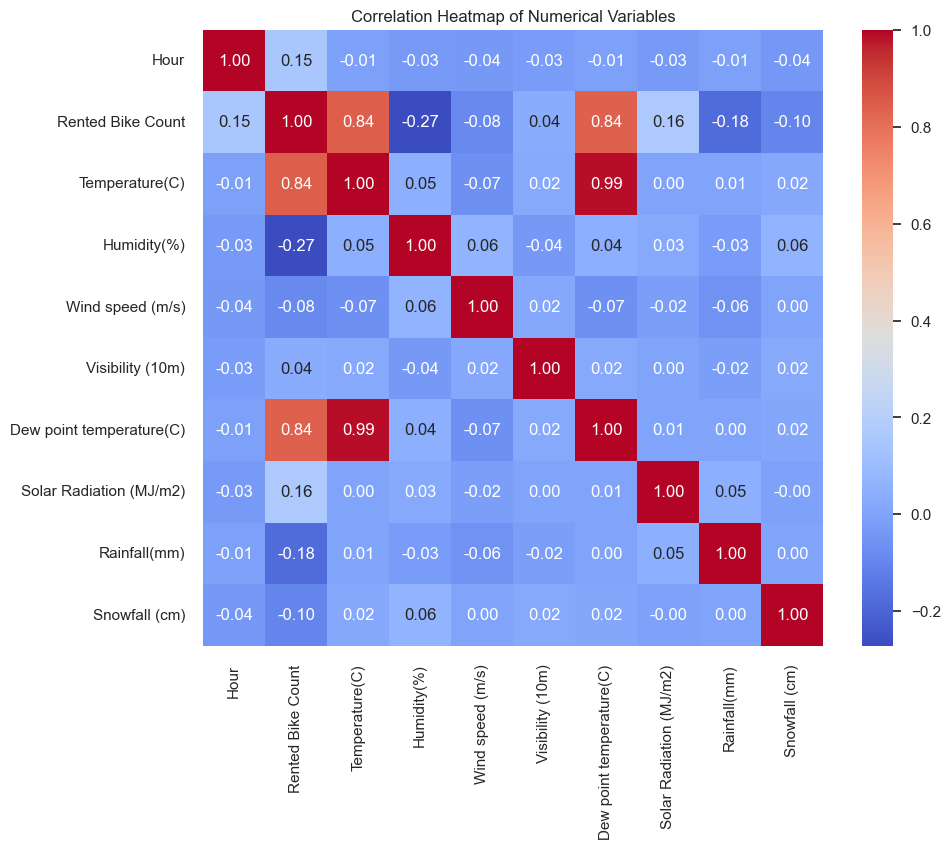

In [27]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


### Graph 14: Correlation Heatmap

The heatmap shows correlation values between all numerical columns.
- Positive values (close to 1) mean strong positive relationship.
- Negative values (close to -1) mean strong negative relationship.

We can see which features (temperature, solar radiation, rainfall, etc.) have stronger relationships with `Rented Bike Count`.


## Overall Insights from the EDA

From all the graphs above, we can summarise:

- **Time patterns:** Bike rentals change clearly by hour, day of the week and month. There are peak hours during the day and differences between weekdays and weekends.
- **Seasonal effects:** Seasons and months strongly influence demand. Certain seasons show higher average rentals than others.
- **Holiday and functioning days:** Rentals are different on holidays vs non-holidays, and almost all records belong to functioning days.
- **Weather effects:** Temperature, humidity, rainfall and other weather features affect rentals. Pleasant weather increases demand, while rain or very bad conditions usually decrease it.
- **Correlations:** The correlation heatmap shows which numerical variables are more strongly related to `Rented Bike Count`. These variables can be important inputs for any future prediction model.

This completes the Exploratory Data Analysis (EDA) for the Seoul Bike Sharing dataset.


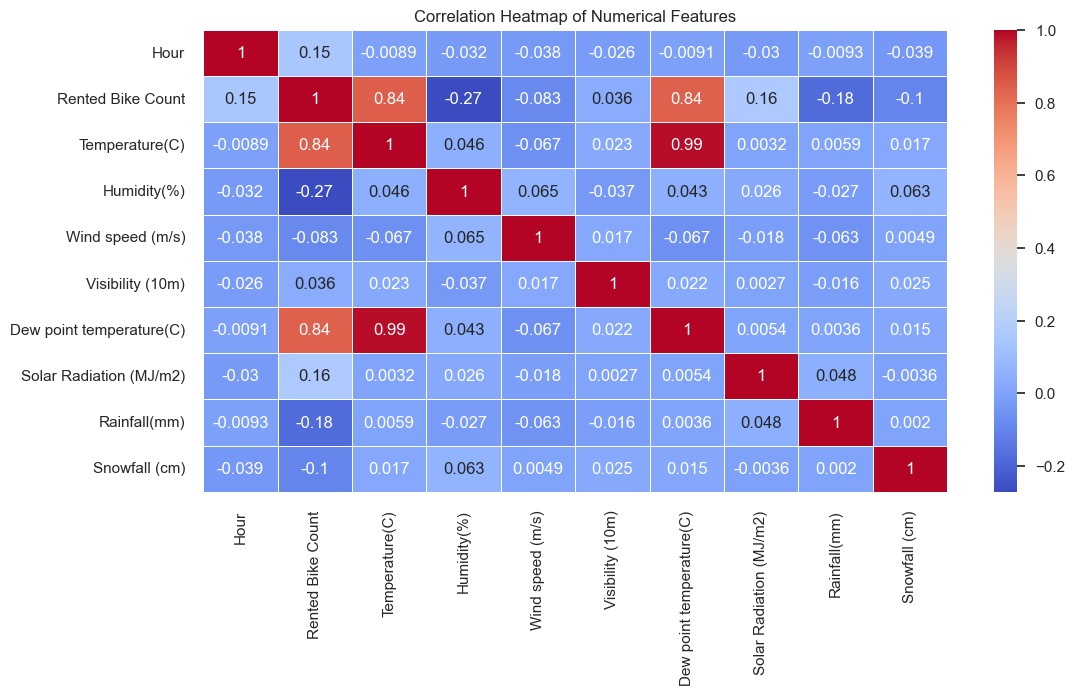

In [30]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
